In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
df = pd.read_csv("../data/ab_test.csv")
df.head()

,uid,diff,time,group
0,user_1,-103.333333,after,test
1,user_1,-6.000000,before,test
2,user_18,-10.000000,after,test
3,user_18,-3.500000,before,test
4,user_19,-82.333333,after,test


In [3]:
df = df[df['group'] == 'test']
df = df.drop(columns=['time', 'group'])
df = df.groupby('uid').mean()
df = df.rename(columns={'diff': 'avg_diff'})
df

,avg_diff
uid,
user_1,-54.666667
user_18,-6.750000
user_19,-115.166667
user_21,-95.500000
user_25,-98.416667
user_28,-94.750000
user_3,-114.250000


In [4]:
con = sqlite3.connect("../data/Checking_Logs.sqlite")

In [5]:
query = """
SELECT 
    uid,
    COUNT(datetime) as pageviews
FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY uid
"""
pageviews = pd.read_sql(query, con, index_col='uid')
pageviews

,pageviews
uid,
user_1,28
user_10,89
user_14,143
user_17,47
user_18,3
user_19,16
user_21,10
user_25,179
user_28,149


In [6]:
query = """
SELECT
    uid,
    COUNT(timestamp) as commits
FROM checker
WHERE
    uid LIKE 'user_%'
    AND labname != 'project1'
GROUP BY uid
"""

commit = pd.read_sql(query, con, index_col='uid')
commit.head()

,commits
uid,
user_0,3
user_1,62
user_10,20
user_11,7
user_12,86


In [7]:
data = pd.concat([df, pageviews, commit], axis='columns', join='inner')
data

,avg_diff,pageviews,commits
uid,,,
user_1,-54.666667,28,62
user_18,-6.750000,3,5
user_19,-115.166667,16,118
user_21,-95.500000,10,65
user_25,-98.416667,179,79
user_28,-94.750000,149,60
user_3,-114.250000,317,18


array([[<Axes: xlabel='avg_diff', ylabel='avg_diff'>,
        <Axes: xlabel='pageviews', ylabel='avg_diff'>,
        <Axes: xlabel='commits', ylabel='avg_diff'>],
       [<Axes: xlabel='avg_diff', ylabel='pageviews'>,
        <Axes: xlabel='pageviews', ylabel='pageviews'>,
        <Axes: xlabel='commits', ylabel='pageviews'>],
       [<Axes: xlabel='avg_diff', ylabel='commits'>,
        <Axes: xlabel='pageviews', ylabel='commits'>,
        <Axes: xlabel='commits', ylabel='commits'>]], dtype=object)

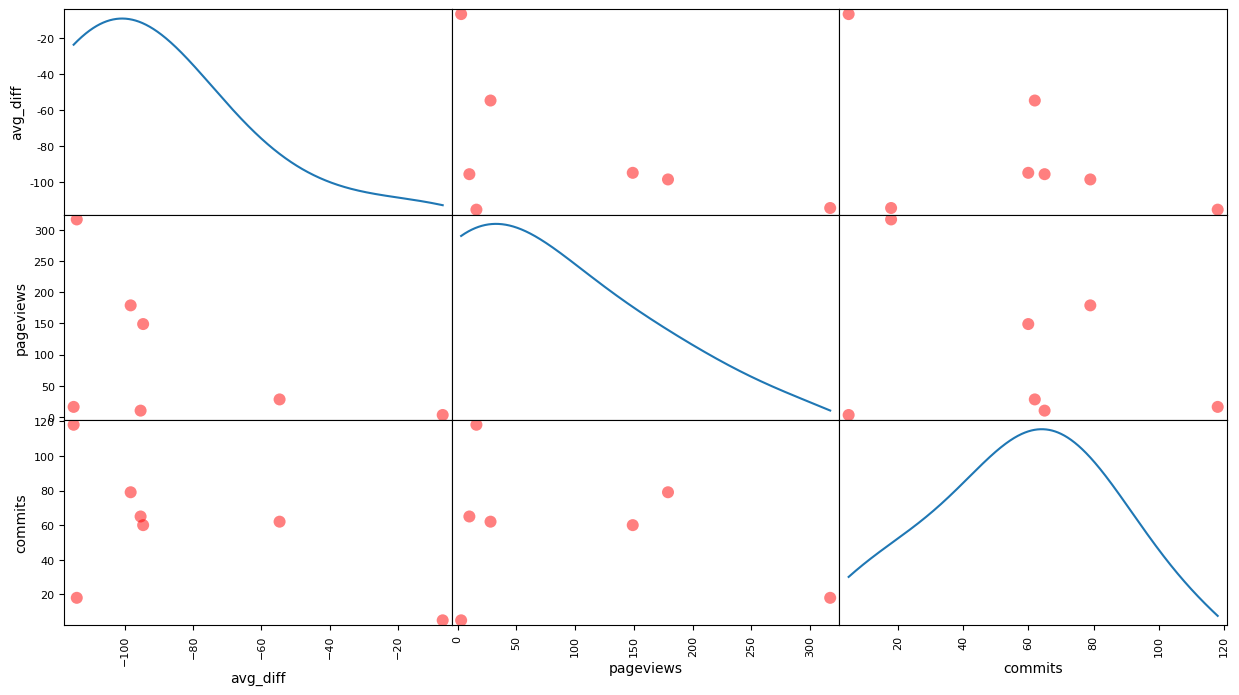

In [8]:
scatter_matrix(data, figsize=(15, 8), diagonal='kde', s=300, color='red')

## Can we say that if a user has a low number of pageviews then they likely have a low number of commits?
- No

## Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?
- No


## Can we say that there are many users with a low number of commits and a few with a high number of commits?
- Yes

## Can we say that there are many users with a small average difference and a few with a large average difference?
- No